# Lakshmi Sushmitha Atluri - 19A1HP115

In [1]:
#Importing packages

import pandas as pd
import numpy as ny

In [2]:
autos = pd.read_csv(r"Advertising.csv")

In [3]:
autos

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,Weekdays,8.4
196,197,94.2,4.9,8.1,Weekdays,10.8
197,198,177.0,9.3,6.4,Weekdays,15.2
198,199,283.6,42.0,66.2,Holiday,4.8


In [4]:
# Information about the datatypes in the dataset

autos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [7]:
#Checking null values

autos.isnull().sum()

Sno          0
TV           0
Radio        0
Newspaper    0
Day          0
Sales        0
dtype: int64

In [8]:
#Drop missing values in the dataset
#dropping null values i.e Tv =1, Radio =1,Newspaper = 1,Day = 3
autos=autos.dropna()

In [9]:
autos.isnull().sum()

Sno          0
TV           0
Radio        0
Newspaper    0
Day          0
Sales        0
dtype: int64

In [10]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [12]:
#Identify the column containing categorical variables

autos['Day'].unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [13]:
#Assign dummy variables to the data 

pd.get_dummies(autos['Day'])[0:5]

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [14]:
categorical_features = ['Day']

In [15]:
X_features = autos.columns
print(X_features)

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day', 'Sales'], dtype='object')


In [16]:
X_features = X_features.drop('Sales')

In [17]:
print(X_features)

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day'], dtype='object')


In [18]:
autos_encoded = pd.get_dummies(autos[X_features], columns = categorical_features)

In [19]:
print(autos_encoded.columns)

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')


In [20]:
#Descriptive summary of all numerical variables

autos.describe()

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [21]:
#Importing visualization packages

import seaborn as sn
import matplotlib.pyplot as plt

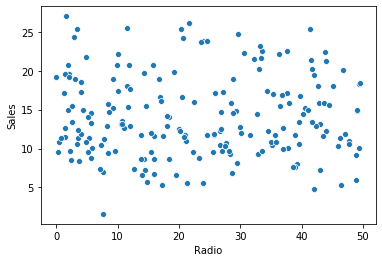

In [22]:
#Scatterplot for TV and Sales

sn.scatterplot(x = 'Radio', y = 'Sales', data = autos) 

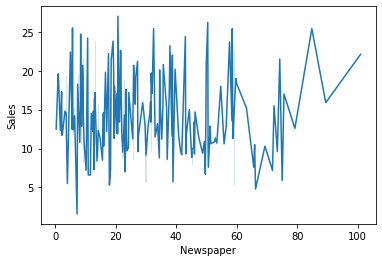

In [23]:
#Line Plot for Radio and Sales

sn.lineplot(x = "Newspaper", y = "Sales", data = autos)
plt.show()  

In [27]:
#Adding constant term to matrix of features, splitting dataset into training and test dataset
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant( autos_encoded )
Y = autos['Sales']
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 58 )

In [28]:
#Model fitting and understanding the summary of the model

model_1 = sm.OLS(train_y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     -0.031   
Dependent Variable: Sales            AIC:                980.7739 
Date:               2020-08-12 13:21 BIC:                1002.1676
No. Observations:   157              Log-Likelihood:     -483.39  
Df Model:           6                F-statistic:        0.2194   
Df Residuals:       150              Prob (F-statistic): 0.970    
R-squared:          0.009            Scale:              28.949   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          10.6906    1.6675   6.4112  0.0000   7.3958  13.9854
Sno             0.0016    0.0076   0.2160  0.8293  -0.0134   0.0167
TV              0.0039    0.0069   0.5642  0.5735  -0.0097   0.0175
Radio          -0.0038    0.0325  -0.1174  0.9067  -0.0681   0.0605
Newspaper       0.0017    0.0217   0.0785  0.9376  -0.0411   0.0445
Day_Holiday     4.5585    2.9870   1.5261  0.1291  -1.3435  10.4605
Day_Weekdays    2.9251    1.1724   2.4950  0.0137   0.6085   5.2417
Day_Weekend     3.2071    1.4295   2.2435  0.0263   0.3826   6.0316
------------------------------------------------------------------
Omnibus:           9.524   Durbin-Watson:      1.874              
Prob(Omnibus):     0.009   Jarque-Bera (JB):   8.170              
Skew:              0.475   Prob(JB):           0.017              
Kurtosis:          2.413   Condition No.:      1100954417021581184
==================================================================
* The condition number is large (1e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

In [30]:
# Multicollinearity Test

#creating VIF calculations

from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [31]:
#Calculating VIF for list of columns

vif_factors = get_vif_factors( X[autos_encoded.columns] )
vif_factors

,column,vif
0,Sno,1.044105
1,TV,1.981276
2,Radio,1.159367
3,Newspaper,1.187723
4,Day_Holiday,1.616170
5,Day_Weekdays,8.979078
6,Day_Weekend,6.191954


In [33]:
#Removing columns with VIF > 4

columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

In [54]:
print(columns_with_large_vif)

5    Day_Weekdays
6     Day_Weekend
Name: column, dtype: object


In [61]:
#Choosing Day_Weekdays column as it is redundant

columns_to_be_removed = ['Day_Weekdays','Day_Weekend']

In [62]:
#Removing Day_Weekday column as it is redundant

X_new_features = list( set(autos_encoded) - set(columns_to_be_removed) )

In [63]:
print(X_new_features)

['Day_Holiday', 'Radio', 'TV', 'Newspaper', 'Sno']


In [86]:
# Model after eliminating multicollinearity
#Model fitting after VIF and removing redundant variable

train_X = train_X[X_new_features]
autos_model_3 = sm.OLS(train_y, train_X).fit()
autos_model_3.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.808    
Dependent Variable:     Sales            AIC:                         1048.1709
Date:                   2020-08-12 13:58 BIC:                         1063.4521
No. Observations:       157              Log-Likelihood:              -519.09  
Df Model:               5                F-statistic:                 133.0    
Df Residuals:           152              Prob (F-statistic):          1.14e-53 
R-squared (uncentered): 0.814            Scale:                       45.017   
-----------------------------------------------------------------------------------
                  Coef.      Std.Err.       t        P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Day_Holiday       1.9327       4.9018     0.3943     0.6939     -7.7518     11.6172
Radio             0.1248       0.0364     3.4319     0.0008      0.0529      0.1966
TV                0.0262       0.0055     4.7272     0.0000      0.0153      0.0372
Newspaper         0.0639       0.0256     2.4960     0.0136      0.0133      0.1145
Sno               0.0463       0.0074     6.2771     0.0000      0.0317      0.0608
-------------------------------------------------------------------------------
Omnibus:                    6.823            Durbin-Watson:               1.904
Prob(Omnibus):              0.033            Jarque-Bera (JB):            6.740
Skew:                       0.506            Prob(JB):                    0.034
Kurtosis:                   3.082            Condition No.:               1766 
===============================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [65]:
# Residual analysis
# PP Plot for checking normality assumption of residuals

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();
    

<Figure size 576x432 with 0 Axes>

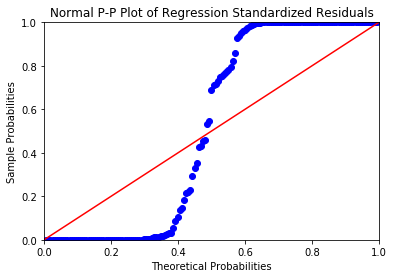

In [66]:
#Plotting graph for PP plot

draw_pp_plot( autos_model_2, "Normal P-P Plot of Regression Standardized Residuals");

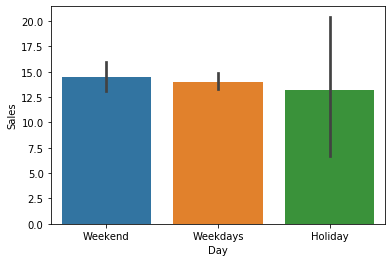

In [78]:
#We can see that sales is most in Weekend followed by weekdays and holiday

sn.barplot(x = 'Day', y = 'Sales', data = autos); 

In [67]:
k = train_X.shape[1]
n = train_X.shape[0]

print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 5  and number of observations: 157


In [68]:
k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 5  and number of observations: 157
Cutoff for leverage value:  0.115


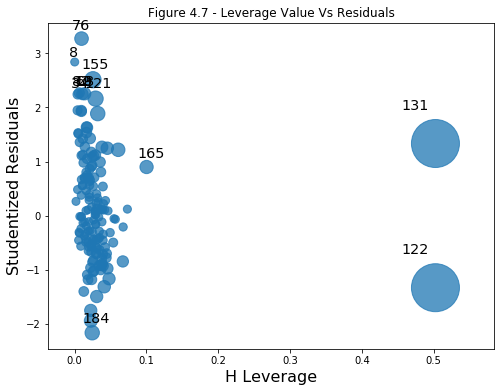

In [70]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( autos_model_2, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

In [71]:
autos[autos.index.isin( [131, 130, 165] )]

,Sno,TV,Radio,Newspaper,Day,Sales
130,131,0.7,39.6,8.7,Weekdays,13.4
131,132,265.2,2.9,43.0,Holiday,24.4
165,166,234.5,3.4,84.8,Weekend,25.4


In [ ]:
train_X_new = train_X.drop( [131, 165, 198], axis = 0)
train_y_new = train_y.drop( [131, 165, 198], axis = 0)

In [72]:
import numpy as np
train_y = np.sqrt( train_y )

<Figure size 576x432 with 0 Axes>

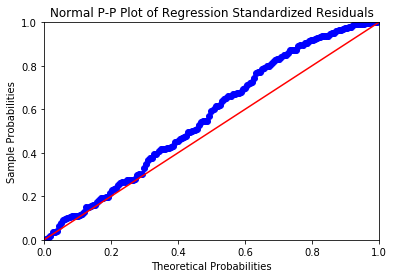

In [74]:
draw_pp_plot( autos_model_3,"Normal P-P Plot of Regression Standardized Residuals");

In [76]:
pred_y = np.power(autos_model_3.predict( test_X[train_X.columns] ), 2)

In [80]:
#Checking the correlation between different variables
autos_encoded.corr()

,Sno,TV,Radio,Newspaper,Day_Holiday,Day_Weekdays,Day_Weekend
Sno,1.000000,0.023044,-0.102923,-0.143636,0.122627,-0.013673,-0.028105
TV,0.023044,1.000000,0.055658,0.095794,0.182032,-0.701157,0.661571
Radio,-0.102923,0.055658,1.000000,0.356668,0.008924,0.001294,-0.004410
Newspaper,-0.143636,0.095794,0.356668,1.000000,0.081890,-0.121552,0.097357
Day_Holiday,0.122627,0.182032,0.008924,0.081890,1.000000,-0.260832,-0.074939
Day_Weekdays,-0.013673,-0.701157,0.001294,-0.121552,-0.260832,1.000000,-0.943123
Day_Weekend,-0.028105,0.661571,-0.004410,0.097357,-0.074939,-0.943123,1.000000


In [77]:
#Checking the RMSE

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

12.675021055410195

In [ ]:
# Manual Calculation

Y = B0 + B1*X1 + B2*x2 + B3*x3 + B4*x4 + B5*x5
  = 10.6906 + (0.0039*283.6) - (0.0038*42) + (0.0017*66.2) + (0.0016*199) + (4.5585*0)
  = 10.6906 + 1.10604 - 0.1596 + 0.11254 + 0.3184 + 0
  = 12.06798